# Example usage of NRSur7dq4 surrogate model
This notebook is based on https://github.com/sxs-collaboration/gwsurrogate/blob/master/tutorial/website/NRSur7dq4.ipynb (accessed 17 June 2020)

In [1]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline

import gwsurrogate

/Users/leo/miniconda3/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/Users/leo/miniconda3/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


## Download surrogate data, this only needs to be done once (per package installation)

In [2]:
# This can take a few minutes
# Uncomment below if you have not yet pulled this surrogate
# gwsurrogate.catalog.pull('NRSur7dq4')

## Load the surrogate, this only needs to be done once at the start of a script

In [3]:
sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

/Users/leo/miniconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:245: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.t = h5file['t_ds'].value
/Users/leo/miniconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:272: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_coefs'%(key)].value,
/Users/leo/miniconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:273: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'bfOrders': group['%s_bfOrders'%(key)].value
/Users/leo/miniconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:282: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_%d_coefs'%(key, i)].value,
/Users/leo/miniconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:283: H5pyDeprecationWarni

Loaded NRSur7dq4 model


## Evaluate the waveform

### Evaluate waveform modes in dimensionless units (default)

In [4]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
dt = 0.1        # timestep size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)   # dyn stands for dynamics, do dyn.keys() to see contents

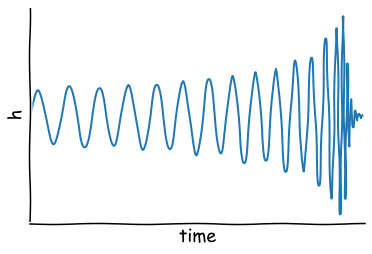

In [6]:
with P.xkcd(scale=0.5):

    P.plot(t, h[(2,2)].real)

    P.ylabel('h', fontsize=18)
    P.xlabel('time', fontsize=18)
    ax = P.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    P.xticks([])
    P.yticks([])
    P.xlim((-1000,75))


### Evaluate waveform at a point on the sky

In [8]:
from gwtools import harmonics

In [9]:
def evaluate_at_point(h_dict, azim, elev):
    """ Compute the timeseries to plot in the lower panel from a given viewpoint
    """
    ph = azim * np.pi/180.
    th = (90. - elev) * np.pi/180.
    h = np.zeros_like(h_dict[list(h_dict.keys())[0]], dtype=complex)
    for key in h_dict.keys():
        ell, m = key
        ylm = harmonics.sYlm(-2, ell, m, th, ph)
        h += h_dict[key]*ylm
    return h

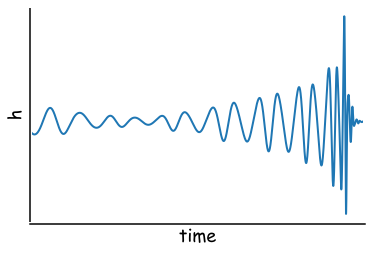

In [10]:
with P.xkcd(scale=0.0, length=0.0, randomness=0.):
    q = 4
    chiA = [-0.2, 0.4, 0.1]
    chiB = [-0.5, 0.2, -0.4]
    dt = 0.1        # timestep size, Units of M
    f_low = 0       # initial frequency, f_low=0 returns the full surrogate
    t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)   # dyn stands for dynamics, do dyn.keys() to see contents

    az, el = 30, 20
    h_pt = evaluate_at_point(h, az, el)

    P.plot(t, h_pt.real)

    P.ylabel('h', fontsize=18)
    P.xlabel('time', fontsize=18)
    ax = P.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    P.xticks([])
    P.yticks([])
    P.xlim((-1000,75))
    P.savefig('./wave1.pdf', bbox_inches='tight')

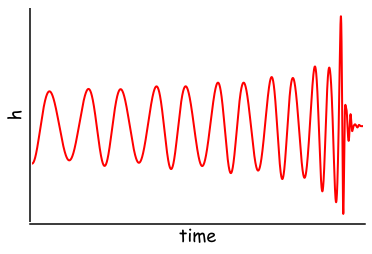

In [11]:
with P.xkcd(scale=0.0, length=0.0, randomness=0.0):
    q = 3
    chiA = [-0.1, 0.1, -0.5]
    chiB = [0.3, 0.1, -0.5]
    dt = 0.1        # timestep size, Units of M
    f_low = 0       # initial frequency, f_low=0 returns the full surrogate
    t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)   # dyn stands for dynamics, do dyn.keys() to see contents

    az, el = 80, 25
    h_pt = evaluate_at_point(h, az, el)

    P.plot(t, h_pt.real, 'r')

    P.ylabel('h', fontsize=18)
    P.xlabel('time', fontsize=18)
    ax = P.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    P.xticks([])
    P.yticks([])
    P.xlim((-1000,75))
    P.savefig('./wave2.pdf', bbox_inches='tight')